In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and preprocessing

In [ ]:
car=pd.read_csv("/content/car data.csv")
car.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car.shape
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
 #for missing values
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#cheking distribution of categgorical data
print(car.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [ ]:
car.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
car.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
#encoding the categorical data
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)#inplace is used for replacing the values.
car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car.head()
car.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


In [ ]:
car.Transmission.value_counts()

0    261
1     40
Name: Transmission, dtype: int64

In [ ]:
car.Seller_Type.value_counts()

0    195
1    106
Name: Seller_Type, dtype: int64

Splitting data

In [ ]:
X= car.drop(['Car_Name','Selling_Price'],axis=1)#axis 1 coz from droppoing column for row=0
#drop krne se in dono ko chhod ke saare auto matic insert ho jayenge
Y=car['Selling_Price']

In [ ]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

Train Test Data

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,random_state=2)#0.1 means 90% data train ke liye and 10% for tsting

# MODEL TRAINING

In [ ]:
#linear regression

lin=LinearRegression()

In [ ]:
lin.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
#prediction on training data

pred=lin.predict(X_train)

In [ ]:
#R squared error from metrics

error=metrics.r2_score(Y_train,pred)#compairision between true and predicted values
print("ERROR : ", error )

ERROR :  0.8799451660493711


Visualizer the Prices and predicted

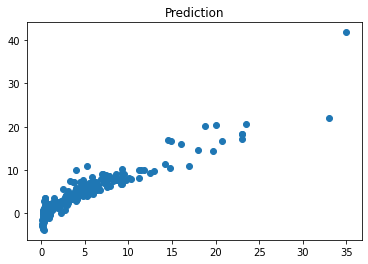

In [ ]:
plt.scatter(Y_train,pred)
plt.title("Prediction")
plt.show()

# **TESTING**

In [ ]:
#prediction on training data

testing=lin.predict(X_test)



In [ ]:
#R squared error from metrics

error=metrics.r2_score(Y_test,testing)#compairision between true and predicted values
print("ERROR : ", error )

ERROR :  0.8365766715027051


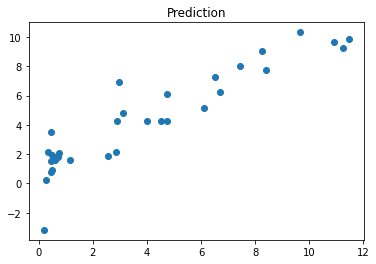

In [ ]:
plt.scatter(Y_test,testing)
plt.title("Prediction")
plt.show()

# **LASSO REGRESSION**

In [ ]:
#lasso regression

lasso=Lasso()

In [ ]:
lasso.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [ ]:
#prediction on training data

pred=lasso.predict(X_train)

In [ ]:
#R squared error from metrics

error=metrics.r2_score(Y_train,pred)#compairision between true and predicted values
print("ERROR : ", error )

ERROR :  0.8427856123435794


Visualizer the Prices and predicted

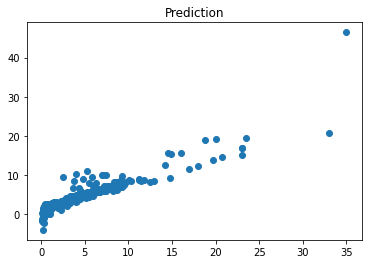

In [ ]:
plt.scatter(Y_train,pred)
plt.title("Prediction")
plt.show()#isme jyda close hai 

# **TESTING** for lasso

In [ ]:
#prediction on training data

testing=lasso.predict(X_test)



In [ ]:
#R squared error from metrics

error=metrics.r2_score(Y_test,testing)#compairision between true and predicted values
print("ERROR : ", error )

ERROR :  0.8709167941173195


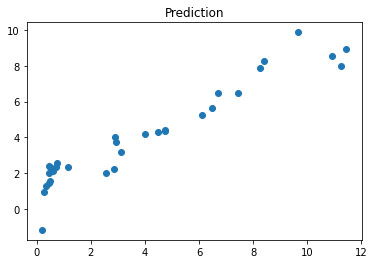

In [ ]:
plt.scatter(Y_test,testing)

plt.title("Prediction")
plt.show()